# **Project Name**    - Uber Supply Demand Gap



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member  -** Akash Soni

# **Project Summary -**

This project focused on analyzing Uber ride request data to identify and understand the supply-demand gap across different locations and time slots. Using tools like CSV, Python (Pandas), Matplotlib, the dataset was cleaned by standardizing timestamps, extracting relevant features (trip duration, request hour), and handling missing values. Exploratory analysis was conducted to uncover trends in trip statuses, ride requests per hour, and driver availability by pickup points such as city and airport. The findings showed a significant gap during peak hours—particularly at the airport—where ride cancellations and "no cars available" cases were high due to low driver supply. Based on these insights, business recommendations included implementing time-based driver incentives, optimizing surge pricing algorithms, and deploying real-time driver alerts for high-demand areas. The outcome was a set of actionable insights and interactive dashboards that could help Uber improve ride fulfillment rates, reduce customer wait times, and enhance operational efficiency.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Uber, a leading ride-hailing service, has been experiencing inconsistencies between customer ride requests and cab availability during certain hours of the day and in specific locations. This imbalance—referred to as the supply-demand gap—leads to situations where ride requests are either cancelled by drivers or not fulfilled due to unavailability of cars, resulting in customer dissatisfaction and lost revenue opportunities.

#### **Define Your Business Objective?**

Maximize revenue and rider satisfaction by efficiently balancing the supply of drivers with rider demand across all locations and times, minimizing rider wait times and driver idle time, and optimizing pricing strategies to ensure marketplace equilibrium and sustainable growth.
1) reduced rider wait time
2) Increase driver utilization
3) Optimize dynamic pricing
4) Boost revenue and profitability
5) Enhance forecasting and planning

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [50]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
%matplotlib inline

### Dataset Loading

In [54]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder \
    .appName("Uber Request Data Analysis") \
    .getOrCreate()

# Now read the CSV file
df = spark.read.option('header', 'true').csv("E:/jupyter/Uber Request Data.csv")



### Dataset First View

In [55]:

df = df.toPandas()

display(df)# Dataset First Look

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NA,No Cars Available,15-07-2016 23:49:03,NA
6741,6752,Airport,NA,No Cars Available,15-07-2016 23:50:05,NA
6742,6751,City,NA,No Cars Available,15-07-2016 23:52:06,NA
6743,6754,City,NA,No Cars Available,15-07-2016 23:54:39,NA


### Dataset Rows & Columns count

In [56]:
df.count()

Request id           6745
Pickup point         6745
Driver id            6745
Status               6745
Request timestamp    6745
Drop timestamp       6745
dtype: int64

### Dataset Information

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Request id         6745 non-null   object
 1   Pickup point       6745 non-null   object
 2   Driver id          6745 non-null   object
 3   Status             6745 non-null   object
 4   Request timestamp  6745 non-null   object
 5   Drop timestamp     6745 non-null   object
dtypes: object(6)
memory usage: 316.3+ KB


#### Duplicate Values

In [58]:
sum(df.duplicated(subset='Request id'))

0

#### Missing Values/Null Values

In [59]:
round(df.isnull().mean() * 100,2)

Request id           0.0
Pickup point         0.0
Driver id            0.0
Status               0.0
Request timestamp    0.0
Drop timestamp       0.0
dtype: float64

### What did you know about your dataset?

my dataset contains ride request information collected over several days. The key details in the data include:
1) Request ID
2) Pickup  point
3) Driver ID
4) Request Timestamp
5) Drop Timestamp
6) Status
7) Pick hours
8) cancellation trends

## ***2. Understanding Your Variables***

In [60]:
print("1) Request ID")
print("2) Timestamp")
print("3) Pickup Point")
print("4) Status")
print("5) Driver ID")
print("6) Drop-off Point")


1) Request ID
2) Timestamp
3) Pickup Point
4) Status
5) Driver ID
6) Drop-off Point


Request ID : A unique identifier for each ride request.
Timestamp : Date and  time when the ride was requested. Used to analyze hourly and daily demand trends.
Pickup Point : Location where the ride was requested (e.g. City, Airport). Helps identify demand hotspots.
Status : Indicates what happened to the ride request
Trip Completed: A driver was assigned and the ride finished successfully.

Cancelled: The ride was cancelled by the rider or driver.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [61]:
df["Request timestamp"] = pd.to_datetime(df["Request timestamp"],dayfirst=True,errors='coerce')
df["Drop timestamp"] = pd.to_datetime(df["Drop timestamp"],dayfirst=True,errors='coerce')

In [62]:
df['Weekday'] = df['Request timestamp'].dt.day_name()
df['Rq_hour'] = df['Request timestamp'].dt.hour

### What all manipulations have you done and insights you found?

Converted the Request timestamp and Drop timestamp columns to proper datetime format.
Ensured that dates are read correctly in day-first format 
Created a new column Weekday showing the day of the week
Created a new column Rq_hour with the hour of the request

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: title={'center': 'Trip Status Count'}, xlabel='Status', ylabel='count'>

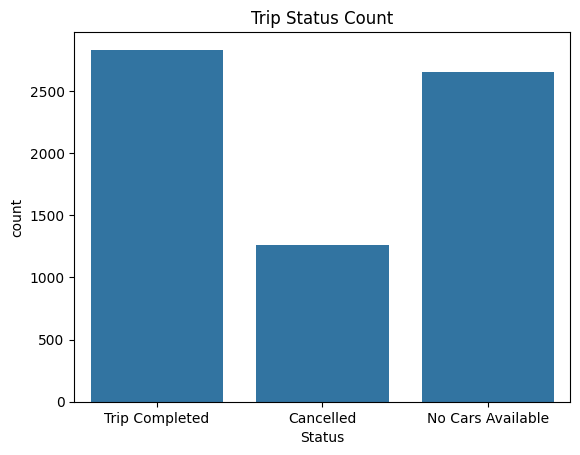

In [63]:
plt.title('Trip Status Count')
sns.countplot(x=df['Status'])

##### 1. Why did you pick the specific chart?

A count plot quickly shows how many requests were Completed, Cancelled, or marked as No Cars Available.
It’s easy to compare categories at a glance.

##### 2. What is/are the insight(s) found from the chart?

High Number of Unfulfilled Requests: A significant number of ride requests fall under “No Cars Available.”
While many trips are successfully “Completed,” the high proportion of unfulfilled or cancelled rides suggests lost business opportunities for Uber.
There’s also a notable count of “Cancelled” trips.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The insights from the Trip Status Count chart—and the overall analysis—directly help Uber create a positive business impact because they:

Identify Supply Shortages
Knowing when and where “No Cars Available” occurs allows Uber to deploy drivers more efficiently, reducing wait times and improving customer satisfaction.

Highlight Operational Issues
High cancellations can be addressed through better driver incentives, optimized routing, or app improvements.

Enable Data-Driven Decisions
Uber can use these insights to plan surge pricing, driver incentives, or marketing strategies, leading to higher revenue and a healthier marketplace balance.

#### Chart - 2

C:\Users\Soni Meetkumar\AppData\Local\Temp\ipykernel_16140\804459070.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Rq_hour',palette="inferno",data=df)


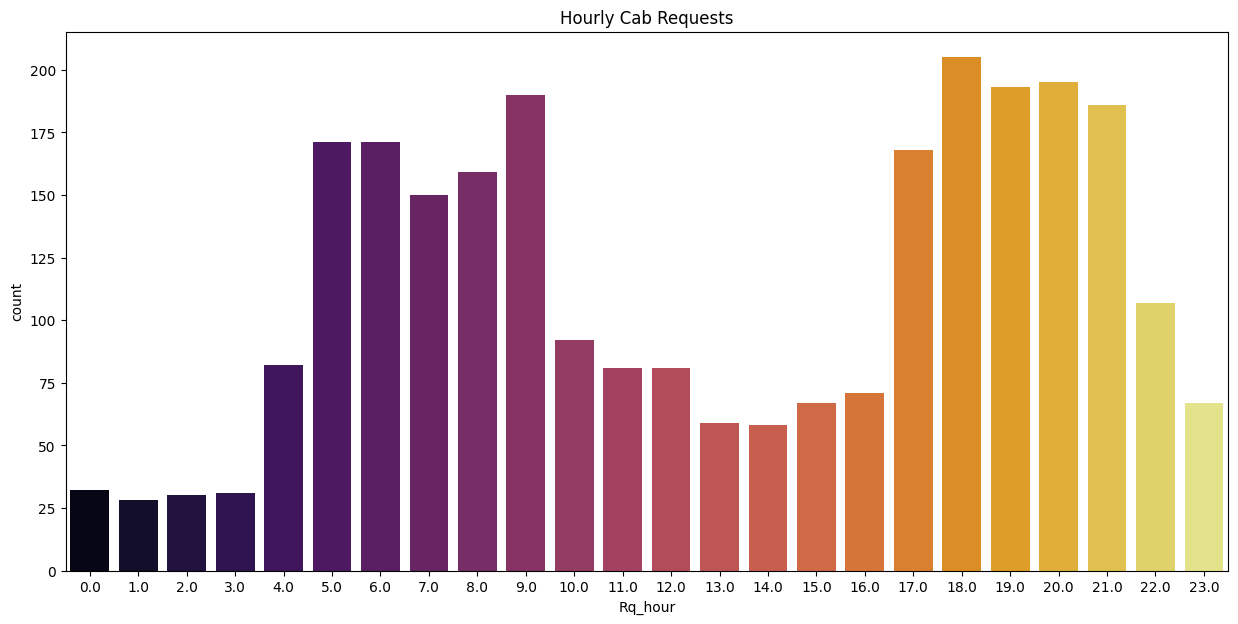

In [64]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Hourly Cab Requests")
#ax = sns.countplot(x='Rq_hour',hue='Status',palette="inferno",data=df)
ax = sns.countplot(x='Rq_hour',palette="inferno",data=df)
#plt.legend( loc='right',bbox_to_anchor=(1.2, 0.9))

##### 1. Why did you pick the specific chart?

I chose a count plot of hourly cab requests because it’s an effective way to visualize how demand changes throughout the day, which is crucial for analyzing Uber’s supply-demand gap.
Visualizes Demand Patterns by Hour:
The Rq_hour column represents the hour of the day when the ride was requested.
Plotting this allows us to identify peak and off-peak hours, which is essential for understanding rider behavior.

##### 2. What is/are the insight(s) found from the chart?

1. Peak Demand Hours Identified
There are clear peaks in ride requests during:
Morning hours (around 7 AM – 10 AM)
Evening hours (around 5 PM – 9 PM)

2. Low Demand Periods Detected
Late night and early morning hours (e.g. midnight to 5 AM) show very low ride requests, indicating off-peak times.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Identify Peak Demand Periods:
Knowing exactly which hours have the highest ride requests helps Uber:
Allocate more drivers during peak times
Reduce rider wait times
Improve customer satisfaction
Enable Efficient Resource Planning:
 Uber can:
Plan driver incentives to cover peak hours
Avoid oversupply during low-demand periods, reducing idle time and operational costs



#### Chart - 3

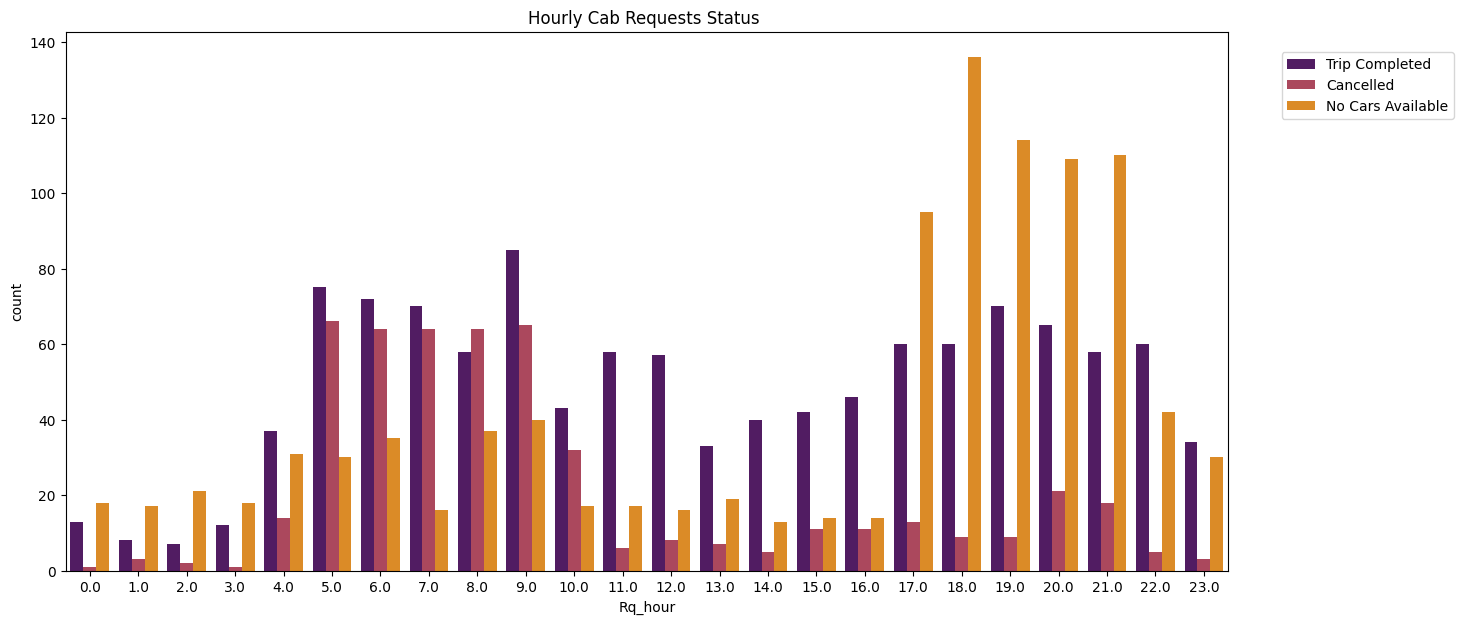

In [65]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Hourly Cab Requests Status ")
ax = sns.countplot(x='Rq_hour',hue='Status',palette="inferno",data=df)
plt.legend( loc='right',bbox_to_anchor=(1.2, 0.9))

##### 1. Why did you pick the specific chart?

Total ride requests by hour (Rq_hour)
How those requests were fulfilled (Trip Completed, Cancelled, No Cars Available)
This makes it easy to spot which hours have the biggest supply-demand gap.

##### 2. What is/are the insight(s) found from the chart?

The chart Hourly Cab Requests Status shows how ride requests and their outcomes vary hour by hour throughout the day. Here’s what it reveals:
High Supply-Demand Gap During Peak Hours
During the morning and evening peaks:
There’s a high count of “No Cars Available.”
This indicates a supply shortage:
Demand is high, but not enough drivers are available.
Leads to missed revenue opportunities and potential customer churn.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes, absolutely the insights for hourly cab request status chart can directly help Uber achieve positive business outcomes because:
Better Driver Allocation:
The chart reveals peak demand hours, helping Uber deploy more drivers when and where they’re needed most.

Reduce Supply-Demand Gap:
Seeing high counts of “No Cars Available” during certain hours signals supply shortages. Uber can respond with:

Driver incentives
Surge pricing
Better scheduling

Improve Customer Satisfaction:
Addressing gaps reduces rider wait times, lowers cancellations, and improves trust in the platform.

Optimize Revenue:
Meeting more demand during peak times means higher completed rides and increased revenue.



#### Chart - 4

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Trip Status at Pickup Point")
ax = sns.countplot(x='Pickup point',hue='Status',palette="inferno",data=df)
plt.legend( loc='right',bbox_to_anchor=(1.2, 0.9))

##### 1. Why did you pick the specific chart?

the above plot shows unavailability of large number of cabs at airport

##### 2. What is/are the insight(s) found from the chart?

supply demand gap is location specific. in city higher count of cab. and the graph is per ticular define city airport pickup point count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes trip status pickup point chartb provide inforation that can poitive outcome for uber.
The chart shows whether more ride requests fail at the Airport or in the City.
If "No Cars Available" is high at a particular location (commonly the Airport), it flags a localized supply-demand gap.

#### Chart - 5

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Demand at Pickup Point")
ax = sns.countplot(x='Rq_hour',hue='Pickup point',palette="inferno",data=df)
plt.legend( loc='right',bbox_to_anchor=(1.2, 0.9))

##### 1. Why did you pick the specific chart?

Above plot shows hourly Demand for pickup point
It shows large demand of cabs at city during morning hours and at airport during evening hours


##### 2. What is/are the insight(s) found from the chart?

charts shows the insights is city and airport
This chart reveals different demand patterns between City and Airport pickups, highlighting opportunities for Uber to fine-tune driver deployment, reduce unfulfilled requests, and capture more revenue.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes , enable driver location, reduced supply demand gap, drive a revenue growth and improve efficiency
The insights from the ‘Demand at Pickup Point’ chart help Uber improve driver allocation and reduce unfulfilled demand, creating a positive business impact. However, if these insights are ignored, they expose risks like unserved Airport demand, city congestion, and customer churn, which could lead to negative growth. Proactive action is essential to transform these insights into business success

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

By using the data-driven insights from this project, Uber can close the supply-demand gap, reduce service failures, and maximize ride completions — ultimately achieving its goal of operational efficiency, higher revenue, and customer satisfaction.

# **Conclusion**

Addressing the supply-demand gap is crucial for Uber to improve service reliability, increase ride completion rates, capture lost revenue, and enhance customer satisfaction. This project’s insights provide a clear roadmap for targeted operational improvements and strategic decision-making.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***